## Analýza zamestnancov VŠ

In [313]:
import pandas as pd

from pandasql import sqldf
# from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import itertools
import numpy as np

ModuleNotFoundError: No module named 'scipy'

In [2]:
df = pd.read_csv('../data/preprocessed/regzam.csv', index_col=0)
display(df)

,Employee_ID,GivenName,FamilyName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Subtype,Employment_BeginDate,Employment_Ratio,Guarantee_StudyProgram,Guarantee_University,Guarantee_Faculty,Guarantee_FormOfStudy,Guarantee_LevelOfStudy,Employment_Workplace_Faculty,Employment_EndDate
0,18799121690,Štefan,Kočan,Doc.,JUDr.,PhD.,Vysoká škola bezpečnostného manažérstva v Koši...,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2020-10-01,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14002860472,Dušan,Korgo,DOC,JUDR,PHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17922733804,Ján,Buzalka,prof.,PhDr.,CSc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16290288493,Jozef,Stieranka,prof.,Ing.,PhD.,Akadémia Policajného zboru,Profesor,s titulom profesor a vysokoškolským vzdelaním ...,2013-11-01,100,"['bezpečnostnoprávna ochrana osôb a majetku', ...","['Akadémia Policajného zboru', 'Akadémia Polic...","[None, None, None, None, None, None, None]","['1', '2', '1', '2', '2', '1', '2']","['1', '1', '2', '2', '2', '3', '3']",NaN,NaN
4,21401303068,Ľuboš,Wäldl,doc.,JUDr.,PhD.,Akadémia Policajného zboru,Profesor,s titulom docent a vysokoškolským vzdelaním tr...,2008-09-01,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32725,12110964830,Joža,Spurný,doc.,JUDr.PhDr.,Ph.D.,Vysoká škola zdravotníctva a sociálnej práce s...,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2022-09-30,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32726,13500390262,Marcela,Harčárová,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32727,17108478442,Jana,Juhásová,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32728,15917135755,Miriama,Kubušová,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
id_set = set(df["Employee_ID"])
print(len(id_set))

32730


-> máme Dataset s 32730 riadkami, pričom žiadne 2 Employee_ID nie sú rovnaké

In [4]:
name_set = set(df["FamilyName"] + " " + df["GivenName"])
len(name_set)

31639

-> 31639 rôznych mien; zostáva zistiť, či pri duplikátnych menách sa jedná o tú istú osobu, alebo nie.
Tiež by nás mohlo zaujímať, ako ukladali osoby, ktorým sa zmenilo meno...

In [5]:
def find_name_duplicates(df):
    name_set = set()
    name_duplicates = set()
    duplicates_ids = set()
    for index, row in df.iterrows():
        name = row["FamilyName"] + " " + row["GivenName"]
        if name in name_set:
            name_duplicates.add(name)
        else:
            name_set.add(name)
    for index, row in df.iterrows():
        name = row["FamilyName"] + " " + row["GivenName"]
        if name in name_duplicates:
            duplicates_ids.add(row["Employee_ID"])
    return tuple(name_duplicates), tuple(duplicates_ids)

In [6]:
name_duplicates, ids = find_name_duplicates(df)

In [7]:
q = f"SELECT * FROM df WHERE Employee_ID IN {ids}"
duplicates_df = sqldf(q, globals()).sort_values(by=['FamilyName', 'GivenName'])
display(duplicates_df)

,Employee_ID,GivenName,FamilyName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Subtype,Employment_BeginDate,Employment_Ratio,Guarantee_StudyProgram,Guarantee_University,Guarantee_Faculty,Guarantee_FormOfStudy,Guarantee_LevelOfStudy,Employment_Workplace_Faculty,Employment_EndDate
1327,49910822214,Katarína,Adamíková,None,Mgr.,None,None,None,None,None,None,None,None,None,None,None,None,None
1576,18913486096,Katarína,Adamíková,None,Mgr.,None,None,None,None,None,None,None,None,None,None,None,None,None
114,39501978150,František,Adamčík,prof.,Ing.,CSc.,Technická univerzita v Košiciach,Profesor,s titulom profesor a vysokoškolským vzdelaním ...,2005-02-01,100,"['prevádzka lietadiel', 'prevádzka lietadiel',...","['Technická univerzita v Košiciach', 'Technick...","['Letecká fakulta', 'Letecká fakulta', 'Leteck...","['1', '1', '2']","['2', '3', '3']",Letecká fakulta,None
1325,17240205086,František,Adamčík,None,Ing.,PhD.,None,None,None,None,None,None,None,None,None,None,None,None
133,51642863772,Jana,Antalová,None,MUDr.,PhD.,Univerzita Komenského v Bratislave,Odborný asistent,s vysokoškolským vzdelaním tretieho stupňa,2020-08-15,100,None,None,None,None,None,Lekárska fakulta,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,15552653387,Tomáš,Žilka,None,MUDr.,None,Slovenská zdravotnícka univerzita v Bratislave,Zamestnanec vykonávajúci činnosti VŠ učiteľa m...,s vysokoškolským vzdelaním druhého stupňa,2022-02-01,100,None,None,None,None,None,Lekárska fakulta,None
1107,10056354153,Viktória,Žilková,None,Mgr.,None,None,None,None,None,None,None,None,None,None,None,None,None
1994,14058627798,Viktória,Žilková,None,None,MSc.,Univerzita Komenského v Bratislave,Výskumný pracovník - výskumník,s vysokoškolským vzdelaním druhého stupňa,2022-06-15,50,None,None,None,None,None,Lekárska fakulta,None
530,14639882132,Anna,Žuffová,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [8]:
df.query("GivenName == 'Viktória' and FamilyName == 'Žilková'")

,Employee_ID,GivenName,FamilyName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Subtype,Employment_BeginDate,Employment_Ratio,Guarantee_StudyProgram,Guarantee_University,Guarantee_Faculty,Guarantee_FormOfStudy,Guarantee_LevelOfStudy,Employment_Workplace_Faculty,Employment_EndDate
17361,10056354153,Viktória,Žilková,NaN,Mgr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32149,14058627798,Viktória,Žilková,NaN,NaN,MSc.,Univerzita Komenského v Bratislave,Výskumný pracovník - výskumník,s vysokoškolským vzdelaním druhého stupňa,2022-06-15,50,NaN,NaN,NaN,NaN,NaN,Lekárska fakulta,NaN


... V tomto bode sme zistili, že naše stiahnuté xml zrejme obsahuje len dáta pre aktuálnych zamestnancov...

Pre minulých (zamestnancov) neobsahuje údaje o zamestnaní, predovšetkým nevieme z dát zistiť, v akom období a kde boli zamestnaní, hoci ich meno je v dátach.

In [9]:
df.query("Employment_EndDate.isna()")

,Employee_ID,GivenName,FamilyName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Subtype,Employment_BeginDate,Employment_Ratio,Guarantee_StudyProgram,Guarantee_University,Guarantee_Faculty,Guarantee_FormOfStudy,Guarantee_LevelOfStudy,Employment_Workplace_Faculty,Employment_EndDate
0,18799121690,Štefan,Kočan,Doc.,JUDr.,PhD.,Vysoká škola bezpečnostného manažérstva v Koši...,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2020-10-01,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14002860472,Dušan,Korgo,DOC,JUDR,PHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17922733804,Ján,Buzalka,prof.,PhDr.,CSc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16290288493,Jozef,Stieranka,prof.,Ing.,PhD.,Akadémia Policajného zboru,Profesor,s titulom profesor a vysokoškolským vzdelaním ...,2013-11-01,100,"['bezpečnostnoprávna ochrana osôb a majetku', ...","['Akadémia Policajného zboru', 'Akadémia Polic...","[None, None, None, None, None, None, None]","['1', '2', '1', '2', '2', '1', '2']","['1', '1', '2', '2', '2', '3', '3']",NaN,NaN
4,21401303068,Ľuboš,Wäldl,doc.,JUDr.,PhD.,Akadémia Policajného zboru,Profesor,s titulom docent a vysokoškolským vzdelaním tr...,2008-09-01,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32725,12110964830,Joža,Spurný,doc.,JUDr.PhDr.,Ph.D.,Vysoká škola zdravotníctva a sociálnej práce s...,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2022-09-30,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32726,13500390262,Marcela,Harčárová,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32727,17108478442,Jana,Juhásová,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32728,15917135755,Miriama,Kubušová,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## -> Až 32434 riadkov nemá EndDate, čo aj potvrdzuje našu hypotézu, že máme zlé dáta :(  (iba súčasné úväzky)

## **- Pracujú zamestnanci aj na viacerých pracoviskách a vidno v tom nejaké trendy alebo zhluky?**

In [118]:
df_workplaces = pd.read_csv('../data/preprocessed/regzam_workplaces_current.csv', index_col=0)
display(df_workplaces)

,Employee_ID,FamilyName,GivenName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Ratio
0,18799121690,Kočan,Štefan,Doc.,JUDr.,PhD.,Vysoká škola bezpečnostného manažérstva v Koši...,Docent,100.00
1,16290288493,Stieranka,Jozef,prof.,Ing.,PhD.,Akadémia Policajného zboru,Profesor,100.00
2,21401303068,Wäldl,Ľuboš,doc.,JUDr.,PhD.,Akadémia Policajného zboru,Profesor,100.00
3,69828748660,Kostrec,Matej,NaN,JUDr.,PhD.,Akadémia Policajného zboru,Odborný asistent,100.00
4,91221451321,Krajníková,Magdaléna,NaN,JUDr.,PhD.,Akadémia Policajného zboru,Odborný asistent,100.00
...,...,...,...,...,...,...,...,...,...
14326,17628642100,Peter,Fabo,NaN,RNDr.,PhD.,Žilinská univerzita v Žiline,Výskumný pracovník - výskumník,20.00
14327,17628642100,Peter,Fabo,NaN,RNDr.,PhD.,Trenčianska univerzita Alexandra Dubčeka v Tre...,Výskumný pracovník - výskumník,100.00
14328,28653015119,Marianna,Berinšterová,NaN,Mgr.,PhD.,Prešovská univerzita v Prešove,Odborný asistent,100.00
14329,28653015119,Marianna,Berinšterová,NaN,Mgr.,PhD.,Vysoká škola medzinárodného podnikania ISM Slo...,Zamestnanec vykonávajúci činnosti VŠ učiteľa m...,5.00


In [119]:
# kontrola - Matusov skolitel :D :
df_workplaces[df_workplaces['FamilyName'] == 'Výrost']

,Employee_ID,FamilyName,GivenName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Ratio
346,53060727347,Výrost,Tomáš,doc.,Ing.,PhD.,Ekonomická univerzita v Bratislave,Docent,100.0
347,53060727347,Výrost,Tomáš,doc.,Ing.,PhD.,Technická univerzita v Košiciach,Docent,50.0


Spravme tabuľku so stĺpcami Employee_ID, GivenName, FamilyName, Number_of_workplaces, Employment_ratio_sum:

In [147]:
df_wp_grouped = df_workplaces[['Employee_ID', 'FamilyName', 'GivenName', 'Employment_Ratio']].groupby(
    ['Employee_ID', 'FamilyName', 'GivenName']).agg(['sum', 'count']).reset_index()
df_wp_grouped['Number_of_workplaces'] = df_wp_grouped['Employment_Ratio']['count']
df_wp_grouped['Employment_Ratio_sum'] = df_wp_grouped['Employment_Ratio']['sum']
df_wp_grouped = df_wp_grouped[['Employee_ID', 'FamilyName', 'GivenName', 'Number_of_workplaces', 'Employment_Ratio_sum']]
display(df_wp_grouped)

,Employee_ID,FamilyName,GivenName,Number_of_workplaces,Employment_Ratio_sum
,,,,,
0,0,Andelić,Mitar,1,30.0
1,10002083378,Monková,Katarína,1,100.0
2,10003232654,Poláčková,Viera,1,100.0
3,10004001298,Olšavský,František,1,100.0
4,10004034887,Bugár,Gabriel,1,100.0
...,...,...,...,...,...
13720,99978511113,Sojka,Peter,1,40.0
13721,99981918818,Pietriková,Miriam,1,100.0
13722,99993250897,Dirgová Luptáková,Iveta,1,100.0


In [149]:
df_wp_grouped[df_wp_grouped['FamilyName'] == 'Výrost']

,Employee_ID,FamilyName,GivenName,Number_of_workplaces,Employment_Ratio_sum
,,,,,
10413,53060727347,Výrost,Tomáš,2,150.0


In [159]:
df_for_plot = df_wp_grouped[['Employee_ID', 'Number_of_workplaces']].groupby(
    'Number_of_workplaces').count().reset_index().rename(columns={'Employee_ID': 'Sum_employees'})
display(df_for_plot)

,Number_of_workplaces,Sum_employees
,,
0,1,13133
1,2,578
2,3,14


Percentuálne vyjadrenie zamestnancov pracujúcich na viac ako 1 univerzite:

In [173]:
((578+14)/(578+14+13133)) * 100

4.313296903460838

In [162]:
latex_string = df_for_plot.to_latex(index=False)
print(latex_string)

\begin{tabular}{rr}
\toprule
Number\_of\_workplaces & Sum\_employees \\
                     \\
\midrule
                   1 &         13133 \\
                   2 &           578 \\
                   3 &            14 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_8962/3185077236.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_for_plot.to_latex(index=False)


<AxesSubplot: xlabel='Number_of_workplaces', ylabel='Sum_employees'>

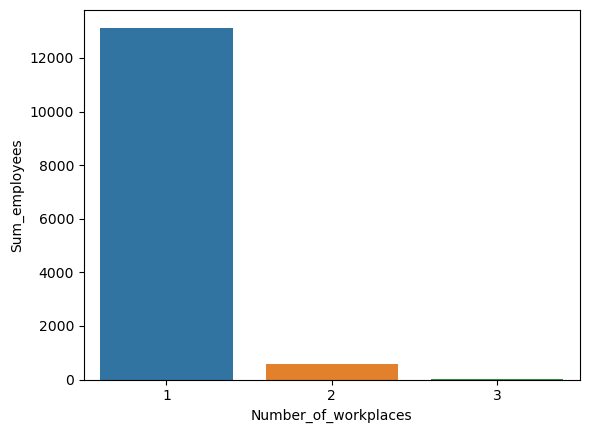

In [163]:
sns.barplot(data=df_for_plot, x='Number_of_workplaces', y='Sum_employees')
# this does not look right

Najväčší sumárny úväzok?

In [255]:
df_wp_grouped['Employment_Ratio_sum'].max()

200.0

Skúsime vytvoriť maticu (univerzita x univerzita) pre počty pracovníkov pre jednotlivé kombinácie univerzít:

In [256]:
# set(df_workplaces['Employment_Workplace_University'])

In [257]:
df_for_matrix = pd.DataFrame()

In [258]:
keys_of_multiworking_employees = list(df_wp_grouped[df_wp_grouped['Number_of_workplaces'] > 1]['Employee_ID'])

Potrebujeme stĺpce pocet, uni1, uni2

In [259]:
lst = []
for key in keys_of_multiworking_employees:
    this_employee = df_workplaces[df_workplaces["Employee_ID"] == key]['Employment_Workplace_University']
    for row1, row2 in itertools.combinations(this_employee, 2):
        lst.append([1, row1, row2])

In [260]:
combinations = pd.DataFrame(lst, columns=['pocet', 'uni1', 'uni2'])
display(combinations)

,pocet,uni1,uni2
0,1,Univerzita Komenského v Bratislave,Slovenská zdravotnícka univerzita v Bratislave
1,1,Univerzita Pavla Jozefa Šafárika v Košiciach,Technická univerzita v Košiciach
2,1,Univerzita sv. Cyrila a Metoda v Trnave,Slovenská technická univerzita v Bratislave
3,1,Univerzita Komenského v Bratislave,Vysoká škola výtvarných umení v Bratislave
4,1,Žilinská univerzita v Žiline,Žilinská univerzita v Žiline
...,...,...,...
631,1,Trenčianska univerzita Alexandra Dubčeka v Tre...,Trenčianska univerzita Alexandra Dubčeka v Tre...
632,1,Žilinská univerzita v Žiline,Žilinská univerzita v Žiline
633,1,Prešovská univerzita v Prešove,Vysoká škola múzických umení v Bratislave
634,1,Žilinská univerzita v Žiline,Žilinská univerzita v Žiline


In [266]:
combinations = combinations.groupby(['uni1', 'uni2']).sum().reset_index().sort_values(by='uni1')

In [267]:
combinations

,uni1,uni2,pocet
0,Akadémia Policajného zboru,Trnavská univerzita v Trnave,1
1,Akadémia Policajného zboru,Univerzita Komenského v Bratislave,3
2,Akadémia umení v Banskej Bystrici,Hudobná a umelecká akadémia Jána Albrechta - B...,3
3,Akadémia umení v Banskej Bystrici,Slovenská zdravotnícka univerzita v Bratislave,1
4,Akadémia umení v Banskej Bystrici,Technická univerzita v Košiciach,2
...,...,...,...
209,Žilinská univerzita v Žiline,Slovenská poľnohospodárska univerzita v Nitre,2
210,Žilinská univerzita v Žiline,Slovenská technická univerzita v Bratislave,3
211,Žilinská univerzita v Žiline,Technická univerzita v Košiciach,1
212,Žilinská univerzita v Žiline,Trenčianska univerzita Alexandra Dubčeka v Tre...,13


In [268]:
matrix = combinations.pivot(index='uni1', columns='uni2', values='pocet')
matrix = matrix.fillna(0)
display(matrix)

uni2,Akadémia Policajného zboru,Akadémia umení v Banskej Bystrici,Bratislavská medzinárodná škola liberálnych štúdií,Ekonomická univerzita v Bratislave,"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",Katolícka univerzita v Ružomberku,Paneurópska vysoká škola,Prešovská univerzita v Prešove,Slovenská poľnohospodárska univerzita v Nitre,Slovenská technická univerzita v Bratislave,...,Vysoká škola DTI,Vysoká škola Danubius,Vysoká škola ekonómie a manažmentu v Bratislave,Vysoká škola manažmentu,Vysoká škola medzinárodného podnikania ISM Slovakia v Prešove,"Vysoká škola medzinárodných a veřejných vztahů Praha, o. p. s.",Vysoká škola múzických umení v Bratislave,Vysoká škola výtvarných umení v Bratislave,"Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.",Žilinská univerzita v Žiline
uni1,,,,,,,,,,,,,,,,,,,,,
Akadémia Policajného zboru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akadémia umení v Banskej Bystrici,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Bratislavská medzinárodná škola liberálnych štúdií,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ekonomická univerzita v Bratislave,0.0,0.0,0.0,10.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Katolícka univerzita v Ružomberku,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Paneurópska vysoká škola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Prešovská univerzita v Prešove,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,2.0,0.0
Slovenská poľnohospodárska univerzita v Nitre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


Treba este symetriu:

In [272]:
matrix = np.maximum(matrix, matrix.T)
display(matrix)

,Akadémia Policajného zboru,Akadémia umení v Banskej Bystrici,Bratislavská medzinárodná škola liberálnych štúdií,Ekonomická univerzita v Bratislave,"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",Katolícka univerzita v Ružomberku,Paneurópska vysoká škola,Prešovská univerzita v Prešove,Slovenská poľnohospodárska univerzita v Nitre,Slovenská technická univerzita v Bratislave,...,Vysoká škola DTI,Vysoká škola Danubius,Vysoká škola ekonómie a manažmentu v Bratislave,Vysoká škola manažmentu,Vysoká škola medzinárodného podnikania ISM Slovakia v Prešove,"Vysoká škola medzinárodných a veřejných vztahů Praha, o. p. s.",Vysoká škola múzických umení v Bratislave,Vysoká škola výtvarných umení v Bratislave,"Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.",Žilinská univerzita v Žiline
Akadémia Policajného zboru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akadémia umení v Banskej Bystrici,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Bratislavská medzinárodná škola liberálnych štúdií,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ekonomická univerzita v Bratislave,0.0,0.0,0.0,10.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Katolícka univerzita v Ružomberku,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Paneurópska vysoká škola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Prešovská univerzita v Prešove,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,2.0,0.0
Slovenská poľnohospodárska univerzita v Nitre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Slovenská technická univerzita v Bratislave,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,78.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,3.0


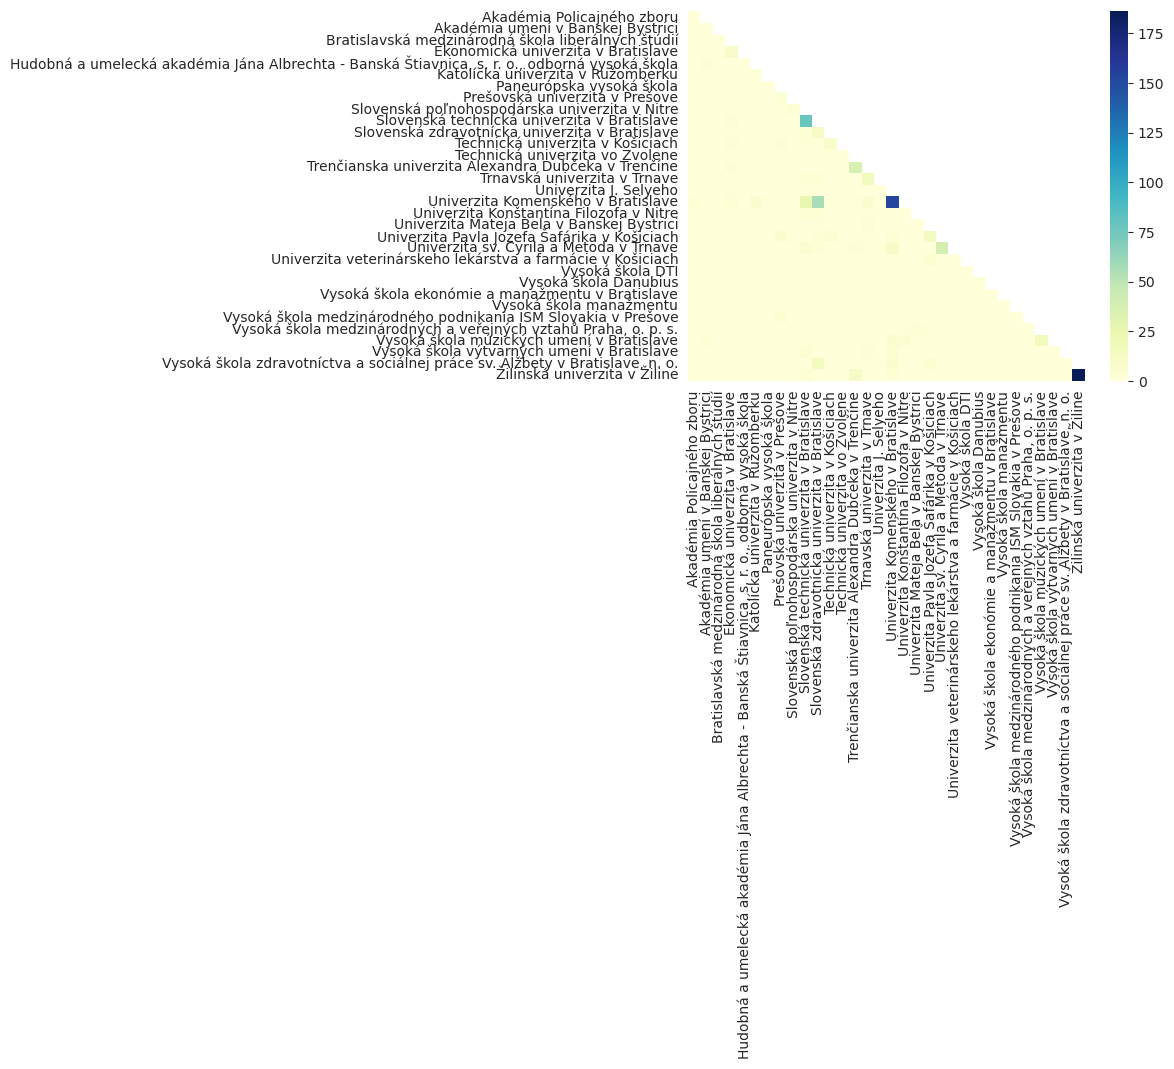

In [294]:
x_ticks = list(matrix.columns)

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(matrix.values, cmap="YlGnBu", mask=mask, xticklabels=x_ticks, yticklabels=x_ticks)
    # ax.set_xticklabels(x_ticks)
    plt.show()

    

In [ ]:
university_abbreviations = {'UNIVERZITA KOMENSKÉHO': 'UK', 
                            'UNIVERZITA P.J.ŠAFÁRIKA': 'UPJŠ', 
                            'KATOLÍCKA UNIVERZITA': 'KU', 
                            'AKADÉMIA UMENÍ': 'AU', 
                            'VŠ VÝTVARNÝCH UMENÍ': 'VŠVU', 
                            'VŠ MÚZICKÝCH UMENÍ': 'VŠMU', 
                            'TECH. UNIVERZITA ZVOLEN': 'TUZVO', 
                            'SLOV. POĽNOHOSP. UNIV.': 'SPU', 
                            'EKONOMICKÁ UNIVERZITA': 'EU', 
                            'TRENČ. UNIV. A.DUBČEKA': 'TUAD', 
                            'TRENČIANSKA UNIVERZITA': 'TUAD',
                            'ŽILINSKÁ UNIVERZITA': 'ŽU', 
                            'TECH. UNIVERZITA KOŠICE': 'TUKE', 
                            'SLOV.TECHN. UNIVERZITA': 'STU', 
                            'TRNAVSKÁ UNIVERZITA': 'TVU', 
                            'UNIVERZITA MATEJA BELA': 'UMB', 
                            'UNIVER. KONŠT. FILOZOFA': 'UKF', 
                            'UNIVERZITA VETERIN.LEK.': 'UVL', 
                            'UNIV.sv.CYRILA a METODA': 'UCM', 
                            'PREŠOVSKÁ UNIVERZITA': 'PU', 
                            'UNIVERZITA J.SELYEHO': 'UJS'}

In [306]:
matrix = matrix.loc[(matrix > 10).any(axis=1), (matrix > 10).any(axis=0)]

display(matrix)

,Slovenská technická univerzita v Bratislave,Slovenská zdravotnícka univerzita v Bratislave,Trenčianska univerzita Alexandra Dubčeka v Trenčíne,Trnavská univerzita v Trnave,Univerzita Komenského v Bratislave,Univerzita Pavla Jozefa Šafárika v Košiciach,Univerzita sv. Cyrila a Metoda v Trnave,Vysoká škola múzických umení v Bratislave,"Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.",Žilinská univerzita v Žiline
Slovenská technická univerzita v Bratislave,78.0,4.0,0.0,3.0,25.0,0.0,6.0,2.0,0.0,3.0
Slovenská zdravotnícka univerzita v Bratislave,4.0,12.0,0.0,3.0,56.0,3.0,3.0,0.0,15.0,0.0
Trenčianska univerzita Alexandra Dubčeka v Trenčíne,0.0,0.0,36.0,1.0,1.0,0.0,3.0,0.0,0.0,13.0
Trnavská univerzita v Trnave,3.0,3.0,1.0,16.0,6.0,1.0,1.0,1.0,2.0,0.0
Univerzita Komenského v Bratislave,25.0,56.0,1.0,6.0,152.0,4.0,11.0,7.0,7.0,4.0
Univerzita Pavla Jozefa Šafárika v Košiciach,0.0,3.0,0.0,1.0,4.0,14.0,0.0,0.0,5.0,0.0
Univerzita sv. Cyrila a Metoda v Trnave,6.0,3.0,3.0,1.0,11.0,0.0,38.0,0.0,2.0,0.0
Vysoká škola múzických umení v Bratislave,2.0,0.0,0.0,1.0,7.0,0.0,0.0,16.0,0.0,0.0
"Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.",0.0,15.0,0.0,2.0,7.0,5.0,2.0,0.0,0.0,0.0
Žilinská univerzita v Žiline,3.0,0.0,13.0,0.0,4.0,0.0,0.0,0.0,0.0,186.0


#### Univerzity s najviac spoločnými zamestnancami

In [310]:
# spravme skratky:
print(list(matrix.columns))
x_ticks = ['STU', 'SZU', 'TUAD', 'TRU', 'UK', 'UPJŠ', 'UCM', 'VŠMU', 'VŠZaSP', 'ŽU']

['Slovenská technická univerzita v Bratislave', 'Slovenská zdravotnícka univerzita v Bratislave', 'Trenčianska univerzita Alexandra Dubčeka v Trenčíne', 'Trnavská univerzita v Trnave', 'Univerzita Komenského v Bratislave', 'Univerzita Pavla Jozefa Šafárika v Košiciach', 'Univerzita sv. Cyrila a Metoda v Trnave', 'Vysoká škola múzických umení v Bratislave', 'Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.', 'Žilinská univerzita v Žiline']


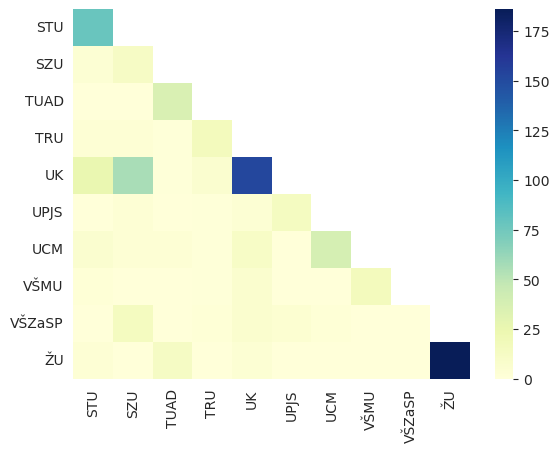

In [311]:
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(matrix.values, cmap="YlGnBu", mask=mask, xticklabels=x_ticks, yticklabels=x_ticks)
    # ax.set_xticklabels(x_ticks)
    plt.show()

Skusime este Cluster map:

In [312]:
sns.clustermap(matrix)

RuntimeError: clustermap requires scipy to be available